In [0]:
import io

from PIL import Image
import requests

from torch.autograd import Variable
import torchvision.models as models
import torchvision.transforms as transforms
import torch 
import matplotlib.pyplot as plt 
import cv2

# Class labels used when training VGG as json, courtesy of the 'Example code' link above.
LABELS_URL = 'https://s3.amazonaws.com/outcome-blog/imagenet/labels.json'

# Let's get our class labels.
response = requests.get(LABELS_URL)  # Make an HTTP GET request and store the response.
labels = {int(key): value for key, value in response.json().items()}

# Now that we have an img, we need to preprocess it.
# We need to:
#       * resize the img, it is pretty big (~1200x1200px).
#       * normalize it, as noted in the PyTorch pretrained models doc,
#         with, mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].
#       * convert it to a PyTorch Tensor.
#
# We can do all this preprocessing using a transform pipeline.
min_img_size = 224  # The min size, as noted in the PyTorch pretrained models doc, is 224 px.
transform_pipeline = transforms.Compose([transforms.Resize(min_img_size),
                                         transforms.ToTensor(),
                                         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                              std=[0.229, 0.224, 0.225])])

# Now let's load our model and get a prediciton!
vgg = models.vgg16(pretrained=True)  # This may take a few minutes.

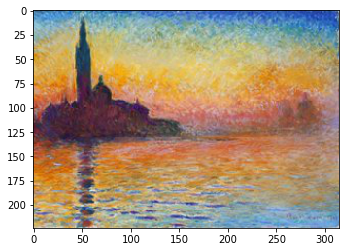

In [113]:
# Random cat img taken from Google
IMG_URL = 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/1200px-Cat03.jpg'
# Let's get the cat img.
response = requests.get(IMG_URL)
img = Image.open(io.BytesIO(response.content))  # Read bytes and store as an img.

img = Image.open('ex_tree_2.jpg', mode='r')
img = Image.open('San-Giorgio-Maggiore-At-Dusk.jpg', mode='r')
img = transform_pipeline(img)

# PyTorch pretrained models expect the Tensor dims to be (num input imgs, num color channels, height, width).
# Currently however, we have (num color channels, height, width); let's fix this by inserting a new axis.
img = img.unsqueeze(0)  # Insert the new axis at index 0 i.e. in front of the other axes/dims. 

# Now that we have preprocessed our img, we need to convert it into a 
# Variable; PyTorch models expect inputs to be Variables. A PyTorch Variable is a  
# wrapper around a PyTorch Tensor.
img = Variable(img)

# Let's take a look at this cat!

image_swapped = img.permute(2,3,1,0).squeeze(3)
image_swapped = (image_swapped-image_swapped.min())/(image_swapped.max()-image_swapped.min())
plt.imshow(image_swapped)
plt.show()

In [114]:
prediction = vgg(img)  # Returns a Tensor of shape (batch, num class labels)
prediction_index_highest = prediction.data.numpy().argmax()  # Our prediction will be the index of the class label with the largest value.
print(labels[prediction_index_highest])  # Converts the index to a string using our labels dict

wreck


In [115]:
top_5 = prediction.data.numpy().argsort()[0][::-1]
[print(labels[index]) for index in top_5[:10] ];

wreck
lakeside, lakeshore
seashore, coast, seacoast, sea-coast
cliff, drop, drop-off
volcano
geyser
space shuttle
fountain
submarine, pigboat, sub, U-boat
ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus
